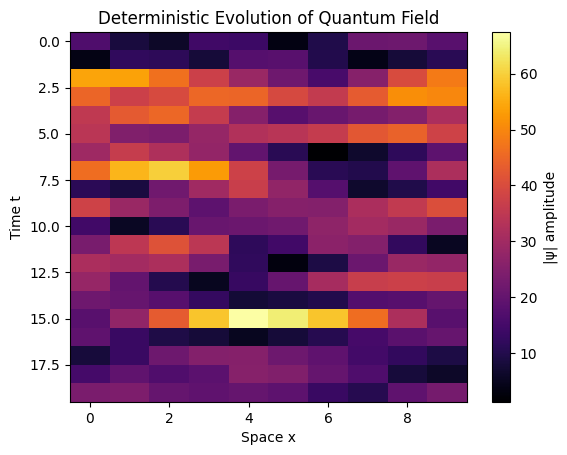

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define simulation parameters
L = 10  # Spatial lattice size
T = 20  # Temporal lattice size
dx = 1.0  # Lattice spacing
dt = 0.1  # Time step
m = 1.0  # Mass term in the Lagrangian

# Initialize complex scalar field psi(x,t)
psi = np.random.randn(T, L) + 1j * np.random.randn(T, L)

# Define the discrete Laplacian operator
def laplacian(psi, dx):
    return (np.roll(psi, -1, axis=1) + np.roll(psi, 1, axis=1) - 2 * psi) / dx**2

# Time evolution using explicit finite difference method
def time_evolution(psi, m, dx, dt, steps=100):
    for _ in range(steps):
        psi += -1j * (laplacian(psi, dx) / (2 * m)) * dt
    return psi

# Run deterministic time evolution
psi_final = time_evolution(psi, m, dx, dt, steps=200)

# Plot final field amplitude
plt.imshow(np.abs(psi_final), cmap='inferno', aspect='auto')
plt.colorbar(label="|ψ| amplitude")
plt.xlabel("Space x")
plt.ylabel("Time t")
plt.title("Deterministic Evolution of Quantum Field")
plt.show()


Initial Action: 125.7875
Final Action: 35491.2683


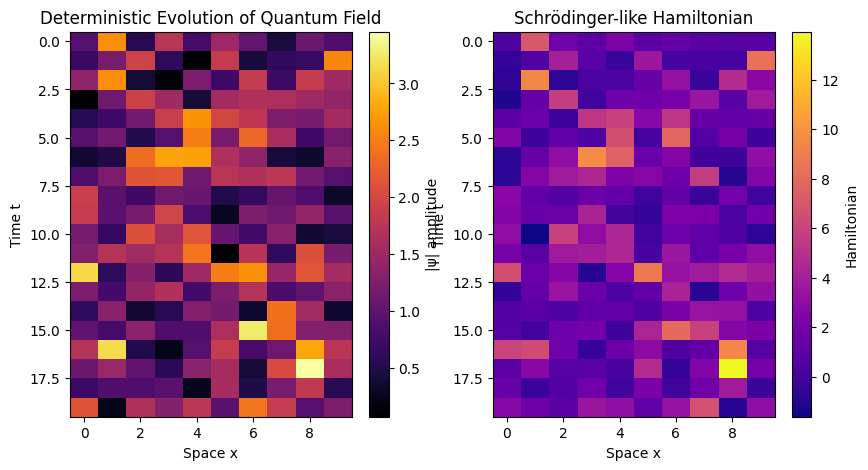

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define simulation parameters
L = 10  # Spatial lattice size
T = 20  # Temporal lattice size
dx = 1.0  # Lattice spacing
dt = 0.1  # Time step
m = 1.0  # Mass term in the Lagrangian

# Initialize complex scalar field psi(x,t)
psi = np.random.randn(T, L) + 1j * np.random.randn(T, L)

# Define creation and annihilation operators
def creation_operator(psi):
    return np.conj(psi)  # Simple representation assuming mode functions

def annihilation_operator(psi):
    return psi  # Basic annihilation action

# Define the Lagrangian density (second quantization formalism)
def lagrangian_density(psi, m, dx, dt):
    time_derivative = (np.roll(psi, -1, axis=0) - psi) / dt  # Forward time difference
    kinetic_term = -0.5 * (np.roll(psi, -1, axis=1) + np.roll(psi, 1, axis=1) - 2 * psi) / dx**2  # Laplacian
    mass_term = m * np.abs(psi)**2  # Mass contribution
    a = annihilation_operator(psi)
    a_dag = creation_operator(psi)
    interaction_term = a_dag * a  # Represents occupation number
    return np.real(1j * np.conj(psi) * time_derivative + kinetic_term + mass_term + interaction_term)

# Define the discrete Laplacian operator
def laplacian(psi, dx):
    return (np.roll(psi, -1, axis=1) + np.roll(psi, 1, axis=1) - 2 * psi) / dx**2

# Compute Schrödinger-like Hamiltonian
def schrodinger_hamiltonian(psi, m, dx):
    return np.real(-laplacian(psi, dx) / (2 * m) + m * np.abs(psi)**2)

# Time evolution using explicit finite difference method
def time_evolution(psi, m, dx, dt, steps=100):
    psi_states = [np.abs(psi.copy())]  # Store time steps for animation
    hamiltonian_states = [schrodinger_hamiltonian(psi, m, dx)]
    for _ in range(steps):
        psi += -1j * (laplacian(psi, dx) / (2 * m)) * dt  # Schrödinger-like evolution
        psi_states.append(np.abs(psi.copy()))
        hamiltonian_states.append(schrodinger_hamiltonian(psi, m, dx))
    return psi, psi_states, hamiltonian_states

# Compute the initial action from the Lagrangian
S_initial = np.sum(lagrangian_density(psi, m, dx, dt) * dx * dt)
print(f"Initial Action: {S_initial:.4f}")

# Run deterministic time evolution
psi_final, psi_states, hamiltonian_states = time_evolution(psi, m, dx, dt, steps=200)

# Compute final action to compare evolution
S_final = np.sum(lagrangian_density(psi_final, m, dx, dt) * dx * dt)
print(f"Final Action: {S_final:.4f}")

# Create animation
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
cax1 = axes[0].imshow(psi_states[0], cmap='inferno', aspect='auto')
cax2 = axes[1].imshow(hamiltonian_states[0], cmap='plasma', aspect='auto')
fig.colorbar(cax1, ax=axes[0], label="|ψ| amplitude")
fig.colorbar(cax2, ax=axes[1], label="Hamiltonian")
axes[0].set_xlabel("Space x")
axes[0].set_ylabel("Time t")
axes[0].set_title("Deterministic Evolution of Quantum Field")
axes[1].set_xlabel("Space x")
axes[1].set_ylabel("Time t")
axes[1].set_title("Schrödinger-like Hamiltonian")

def update(frame):
    cax1.set_array(psi_states[frame])
    cax2.set_array(hamiltonian_states[frame])
    return cax1, cax2

ani = animation.FuncAnimation(fig, update, frames=len(psi_states), interval=50, blit=False)
plt.show()
